In [ ]:
#QUE-1) Predict delivery time using sorting time.
#Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Load dataset
df=pd.read_csv('/content/sample_data/delivery_time.csv')

EDA and Feature Engineering

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [ ]:
#count of duplicate rows
df[df.duplicated()].shape

(0, 2)

In [ ]:
# Renaming Columns
DTime=df.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
DTime

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


Visualizng Data 

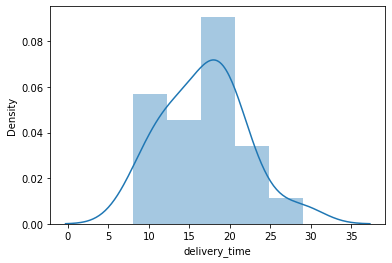

In [ ]:
sns.distplot(DTime['delivery_time'])

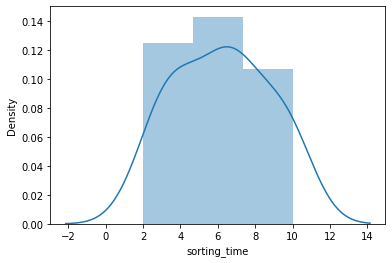

In [ ]:
sns.distplot(DTime['sorting_time'])

correlation

In [ ]:
DTime.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


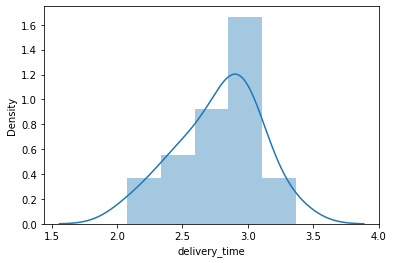

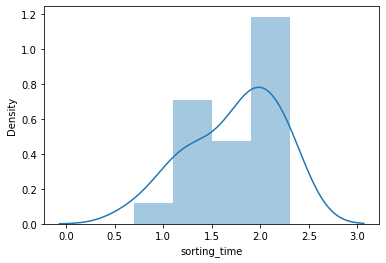

<Figure size 432x288 with 0 Axes>

In [ ]:
#use any one transformation(LOG,LOG Sqr,BOX-COX)till skewness is removed
#perform LOG transformations
data=DTime
data['delivery_time']=np.log(data['delivery_time'])
data['sorting_time']=np.log(data['sorting_time'])
sns.distplot(data['delivery_time'])
fig=plt.figure()
sns.distplot(data['sorting_time'])
fig=plt.figure()

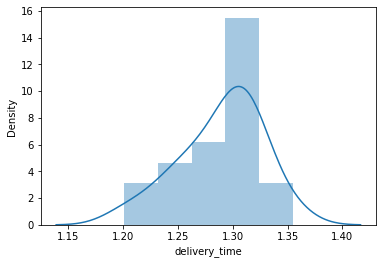

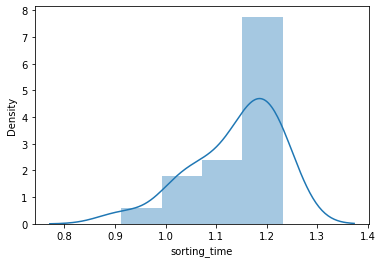

<Figure size 432x288 with 0 Axes>

In [ ]:
#perform LOG Squareroot transformations
data_sqrt=np.sqrt(data)
data_sqrt['delivery_time']=np.sqrt(data_sqrt['delivery_time'])
data_sqrt['sorting_time']=np.sqrt(data_sqrt['sorting_time'])
sns.distplot(data_sqrt['delivery_time'])
fig=plt.figure()
sns.distplot(data_sqrt['sorting_time'])
fig=plt.figure()

Model Building

In [ ]:
import statsmodels.formula.api as smf
model=smf.ols("delivery_time~sorting_time",data=data_sqrt).fit()

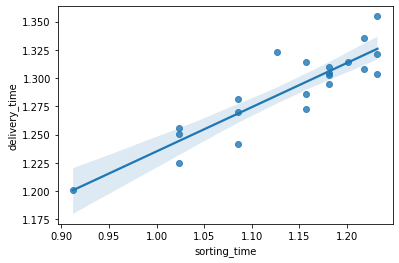

In [ ]:
sns.regplot(x=data_sqrt['sorting_time'],y=data_sqrt['delivery_time'])

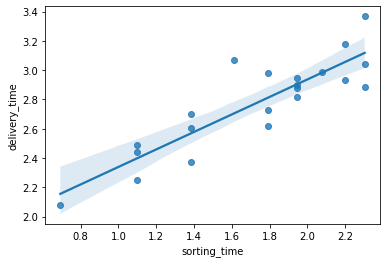

In [ ]:
sns.regplot(x=data['sorting_time'],y=data['delivery_time'])

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     74.67
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           5.23e-08
Time:                        08:02:13   Log-Likelihood:                 56.138
No. Observations:                  21   AIC:                            -108.3
Df Residuals:                      19   BIC:                            -106.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.8434      0.052     16.308      0.000       0.735       0.952
sorting_time     0.3917      0.045      8.641      0.000       0.297       0.487
==============================================================================
Omnibus:                        0.822   Durbin-Watson:                   1.401
Prob(Omnibus):                  0.663   Jarque-Bera (JB):                0.572
Skew:                           0.384   Prob(JB):                        0.751
Kurtosis:                       2.749   Cond. No.                         27.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#finding coefficient parameters
model.params

Intercept       0.843401
sorting_time    0.391721
dtype: float64

In [ ]:
#finding t-values and p-values
model.tvalues, model.pvalues

(Intercept       16.308287
 sorting_time     8.641312
 dtype: float64, Intercept       1.253366e-12
 sorting_time    5.233659e-08
 dtype: float64)

Predicting Model

In [ ]:
print('delivery_time using sorting_time:')
model.predict(data)

delivery_time using sorting_time:


0     1.745372
1     1.386441
2     1.545271
3     1.704100
4     1.745372
5     1.545271
6     1.605655
7     1.273750
8     1.745372
9     1.704100
10    1.657962
11    1.386441
12    1.605655
13    1.273750
14    1.273750
15    1.386441
16    1.545271
17    1.605655
18    1.114921
19    1.605655
20    1.473851
dtype: float64